**Goal:** To demonstrate the fundamental operations of self-attention, multi-head attention, and causal masking.

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(0)

Toy sequence

In [2]:
seq_len = 6
d_model = 4

# simple, distinct token embeddings
x = torch.eye(seq_len, d_model)[:seq_len]

Hand-wire scaled dot-product attention for ONE token

In [3]:
#Step 1: define Q, K, V projections
Wq = torch.randn(d_model, d_model)
Wk = torch.randn(d_model, d_model)
Wv = torch.randn(d_model, d_model)

Q = x @ Wq
K = x @ Wk
V = x @ Wv

In [4]:
#Step 2: pick ONE token and compute attention manually
token_idx = 2  # focus on token 2

q = Q[token_idx]
scores = q @ K.T
scaled_scores = scores / np.sqrt(d_model)
weights = torch.softmax(scaled_scores, dim=-1)

In [5]:
#Step 3: apply weights to values
output = weights @ V

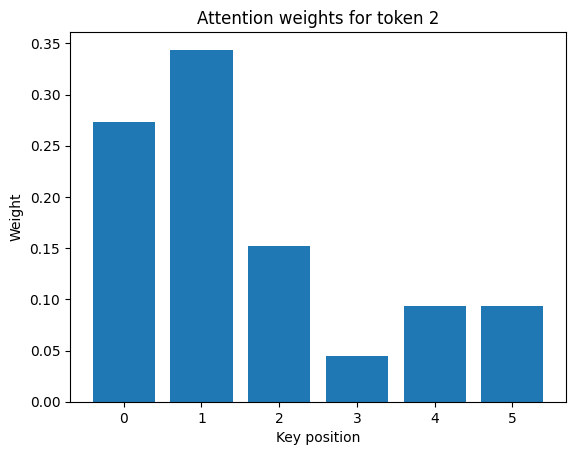

In [6]:
plt.bar(range(seq_len), weights.detach())
plt.title(f"Attention weights for token {token_idx}")
plt.xlabel("Key position")
plt.ylabel("Weight")
plt.show()

Full self-attention matrix (all tokens at once)

In [7]:
scores = Q @ K.T
scores /= np.sqrt(d_model)
attn = torch.softmax(scores, dim=-1)

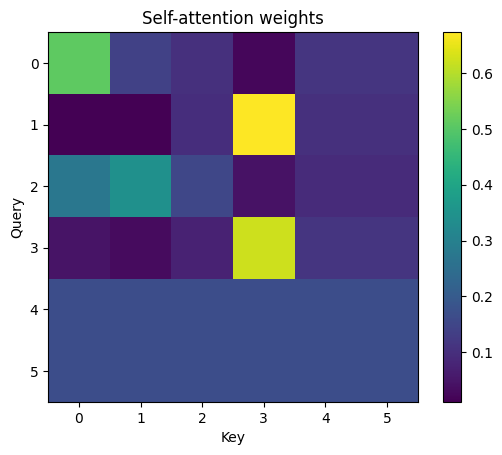

In [8]:
plt.imshow(attn.detach())
plt.title("Self-attention weights")
plt.colorbar()
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()

Multi-head attention (manually, no nn.MultiheadAttention)

In [9]:
#Step 1: split into heads
num_heads = 2
head_dim = d_model // num_heads

def split_heads(x):
    return x.view(seq_len, num_heads, head_dim)

In [10]:
#Step 2: separate projections per head
Qh = split_heads(Q)
Kh = split_heads(K)
Vh = split_heads(V)

In [11]:
#Step 3: attention per head
attn_heads = []

for h in range(num_heads):
    scores = Qh[:,h] @ Kh[:,h].T
    scores /= np.sqrt(head_dim)
    attn_h = torch.softmax(scores, dim=-1)
    attn_heads.append(attn_h)

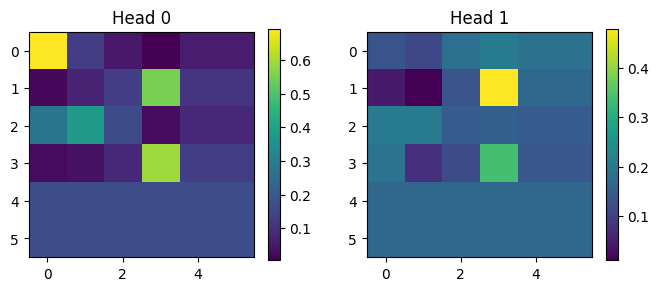

In [12]:
plt.figure(figsize=(8,3))

for h in range(num_heads):
    plt.subplot(1, num_heads, h+1)
    plt.imshow(attn_heads[h].detach())
    plt.title(f"Head {h}")
    plt.colorbar()

plt.show()

Masking: enforce causality

In [13]:
#Step 1: build causal mask
mask = torch.triu(torch.ones(seq_len, seq_len), diagonal=1)
mask = mask * -1e9

In [14]:
#Step 2: apply mask BEFORE softmax
scores = Q @ K.T
scores = scores / np.sqrt(d_model)
scores = scores + mask

attn_causal = torch.softmax(scores, dim=-1)

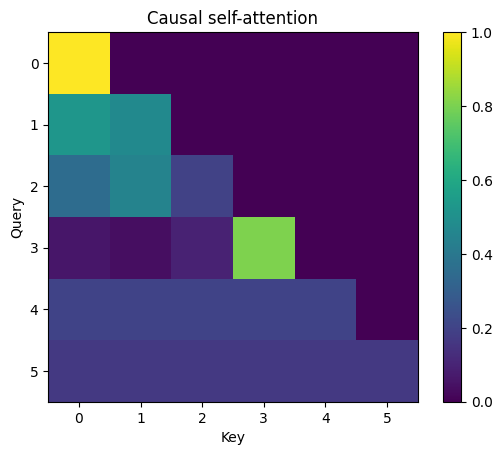

In [15]:
plt.imshow(attn_causal.detach())
plt.title("Causal self-attention")
plt.colorbar()
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()

Verify the causal property explicitly

In [16]:
for i in range(seq_len):
    future_attention = attn_causal[i, i+1:].sum()
    print(f"Token {i} attending to future:", future_attention.item())

Token 0 attending to future: 0.0
Token 1 attending to future: 0.0
Token 2 attending to future: 0.0
Token 3 attending to future: 0.0
Token 4 attending to future: 0.0
Token 5 attending to future: 0.0


Notebook Summary

**Achieved:**



*   Manual implementation and visualization of single-head and full self-attention.
*   Decomposition and visualization of multi-head attention components.
*   Application and verification of causal masking to prevent future information leakage.

**Result:** Successfully illustrated the underlying mechanisms of transformer attention through clear, step-by-step code and visualizations.


